In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("commodity_prices.csv")

In [5]:
df.head()

,Unnamed: 0,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1,1960-01-01,1.63,1.63,0.9409,0.696864,0.930301,1.121401,1.0374,0.122356,0.116845,0.0666
1,2,1960-02-01,1.63,1.63,0.9469,0.688707,0.930301,1.121401,1.0374,0.122356,0.119049,0.0679
2,3,1960-03-01,1.63,1.63,0.9281,0.688707,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683
3,4,1960-04-01,1.63,1.63,0.9303,0.684519,0.930301,1.121401,1.0374,0.122356,0.123459,0.0681
4,5,1960-05-01,1.63,1.63,0.9200,0.690692,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683


In [7]:
df.isnull().sum()

Unnamed: 0         0
date               0
oil_brent          0
oil_dubai          0
coffee_arabica     0
coffee_robustas    0
tea_columbo        0
tea_kolkata        0
tea_mombasa        0
sugar_eu           0
sugar_us           0
sugar_world        0
dtype: int64

In [9]:
df.duplicated().sum()

0

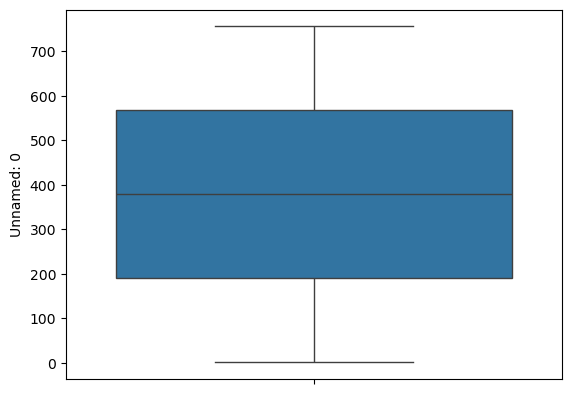

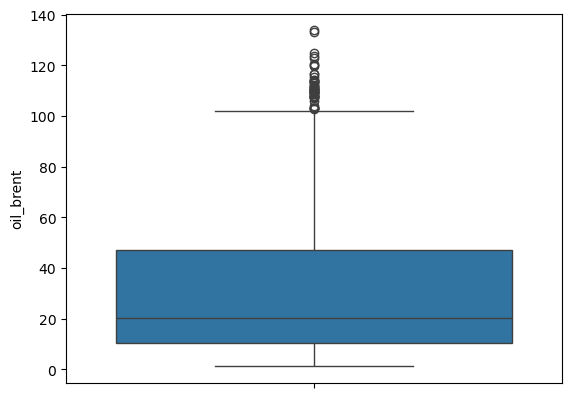

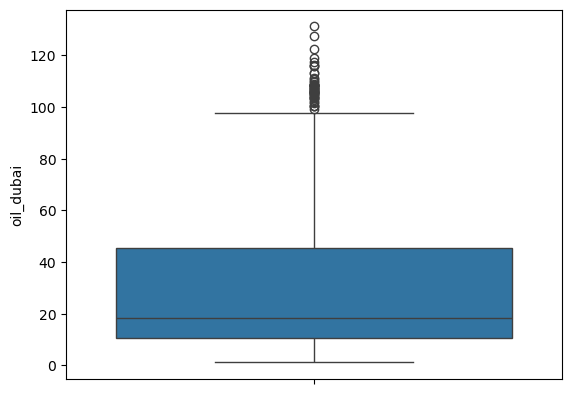

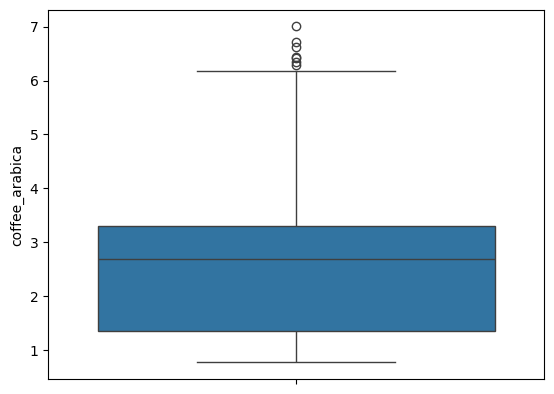

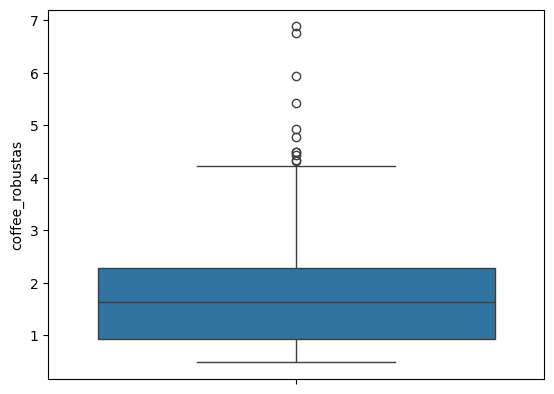

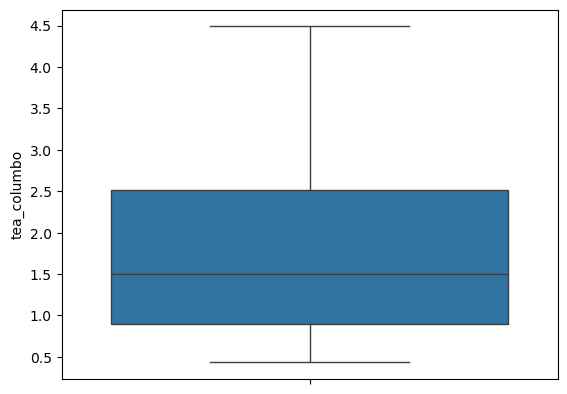

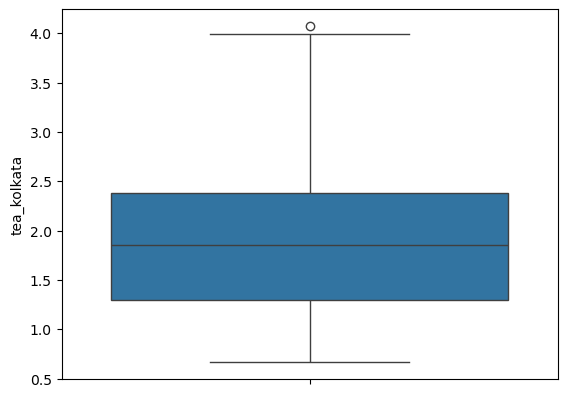

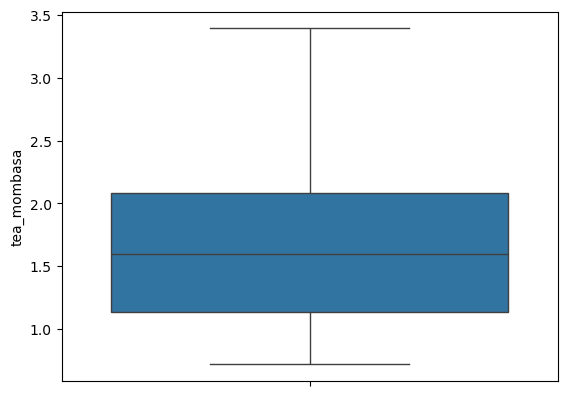

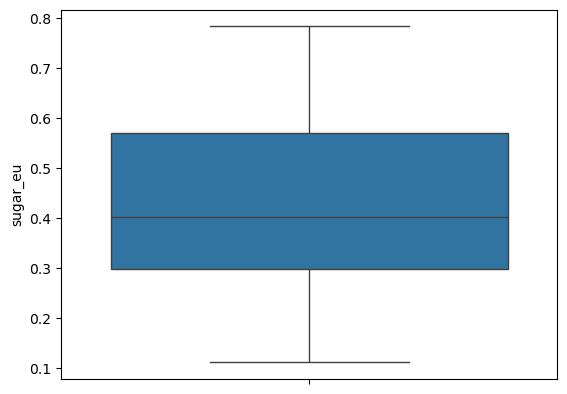

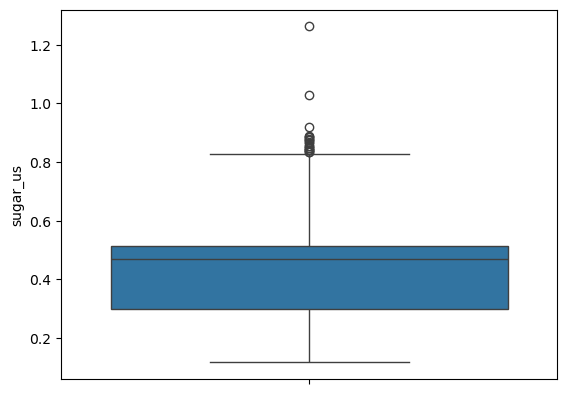

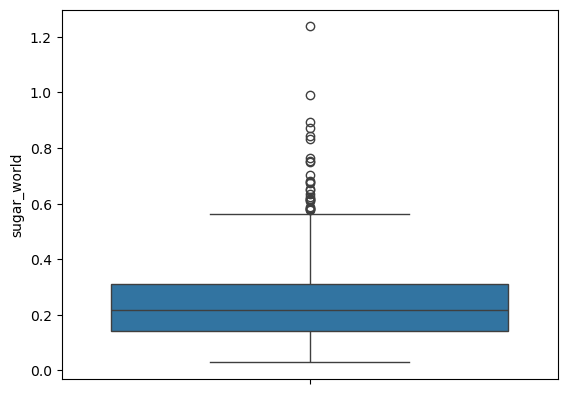

In [15]:
for col in df.columns:
    if (df[col].dtype != 'object'):
        sns.boxplot(data = df, y = col)
        plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       756 non-null    int64  
 1   date             756 non-null    object 
 2   oil_brent        756 non-null    float64
 3   oil_dubai        756 non-null    float64
 4   coffee_arabica   756 non-null    float64
 5   coffee_robustas  756 non-null    float64
 6   tea_columbo      756 non-null    float64
 7   tea_kolkata      756 non-null    float64
 8   tea_mombasa      756 non-null    float64
 9   sugar_eu         756 non-null    float64
 10  sugar_us         756 non-null    float64
 11  sugar_world      756 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 71.0+ KB


In [88]:
df = df.drop(columns = 'Unnamed: 0')

In [25]:
df.head()

,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1960-01-01,1.63,1.63,0.9409,0.696864,0.930301,1.121401,1.0374,0.122356,0.116845,0.0666
1,1960-02-01,1.63,1.63,0.9469,0.688707,0.930301,1.121401,1.0374,0.122356,0.119049,0.0679
2,1960-03-01,1.63,1.63,0.9281,0.688707,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683
3,1960-04-01,1.63,1.63,0.9303,0.684519,0.930301,1.121401,1.0374,0.122356,0.123459,0.0681
4,1960-05-01,1.63,1.63,0.9200,0.690692,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683


In [104]:
df['date'] = pd.to_datetime(df['date'])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 0 to 739
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             576 non-null    datetime64[ns]
 1   oil_brent        576 non-null    float64       
 2   oil_dubai        576 non-null    float64       
 3   coffee_arabica   576 non-null    float64       
 4   coffee_robustas  576 non-null    float64       
 5   tea_columbo      576 non-null    float64       
 6   tea_kolkata      576 non-null    float64       
 7   tea_mombasa      576 non-null    float64       
 8   sugar_eu         576 non-null    float64       
 9   sugar_us         576 non-null    float64       
 10  sugar_world      576 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 54.0 KB


In [100]:
pd.Timestamp.now()

Timestamp('2025-06-28 11:06:36.419005')

In [53]:
l = df['date'].size
for col in df.columns:
    if (df[col].dtype != 'object'):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5*iqr
        ub = q3 + 1.5*iqr
        df = df[(df[col]>=lb) & (df[col]<=ub)]
print(f"rows removed: {l - df['date'].size}")

rows removed: 180


In [55]:
df.head()

,Unnamed: 0,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1,1960-01-01,1.63,1.63,0.9409,0.696864,0.930301,1.121401,1.0374,0.122356,0.116845,0.0666
1,2,1960-02-01,1.63,1.63,0.9469,0.688707,0.930301,1.121401,1.0374,0.122356,0.119049,0.0679
2,3,1960-03-01,1.63,1.63,0.9281,0.688707,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683
3,4,1960-04-01,1.63,1.63,0.9303,0.684519,0.930301,1.121401,1.0374,0.122356,0.123459,0.0681
4,5,1960-05-01,1.63,1.63,0.9200,0.690692,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683


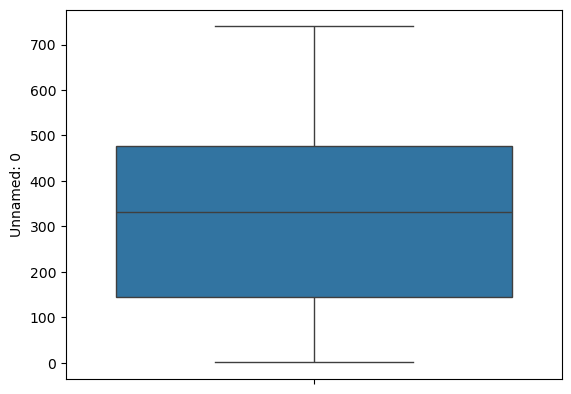

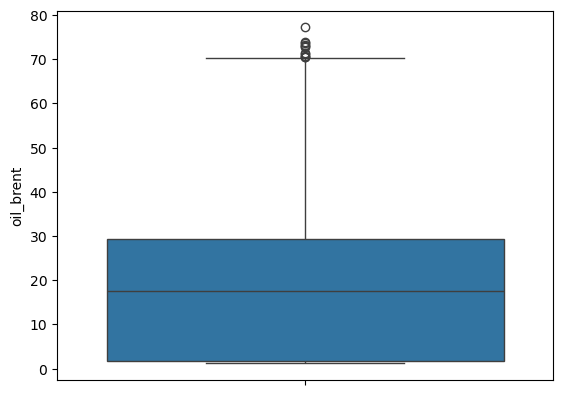

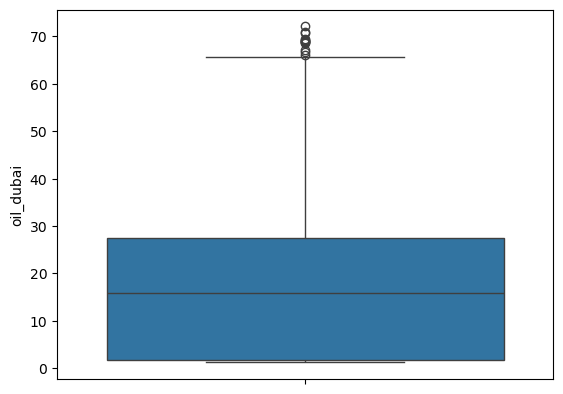

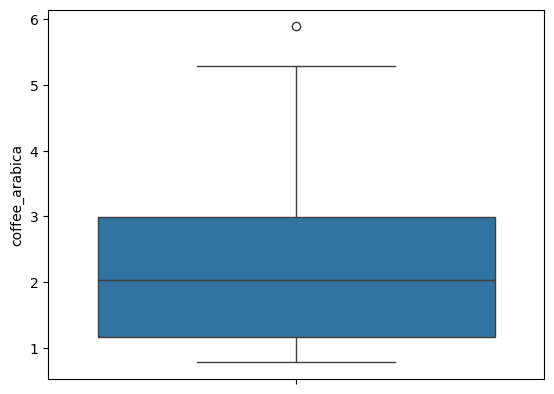

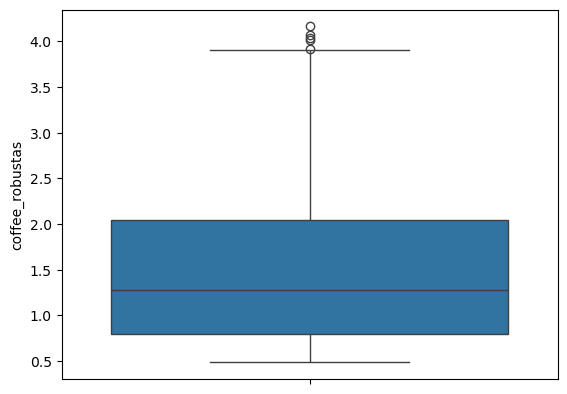

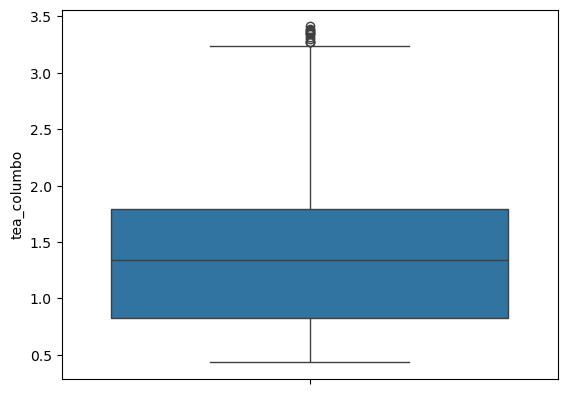

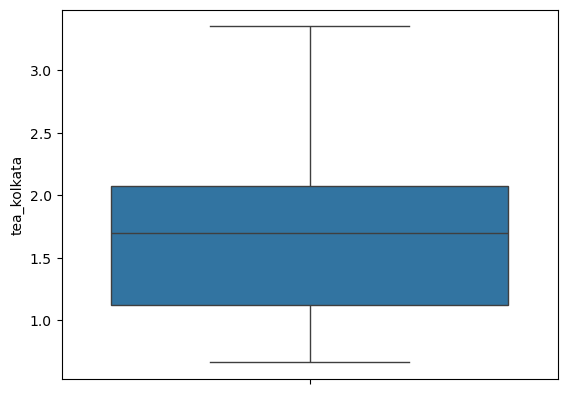

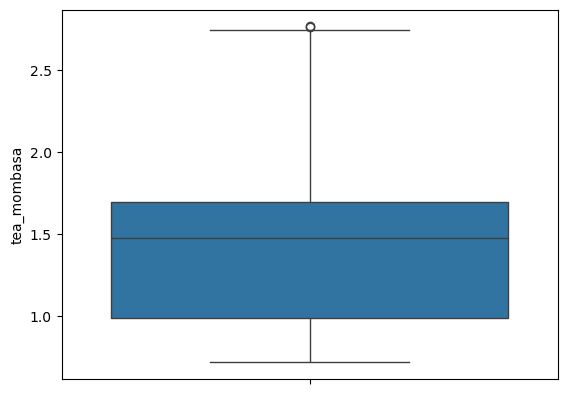

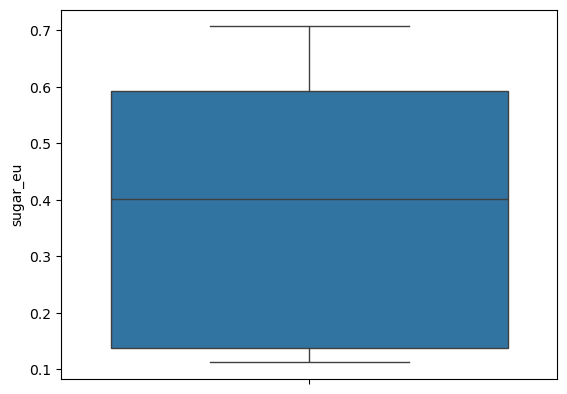

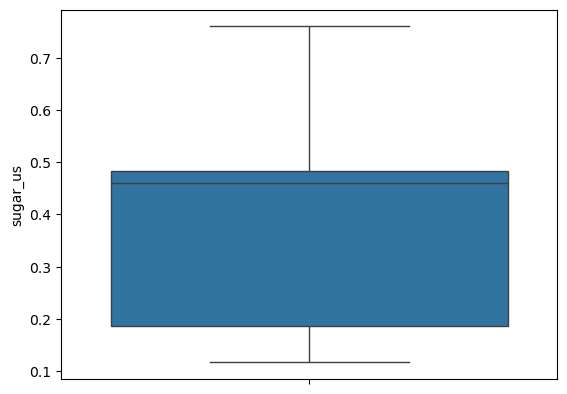

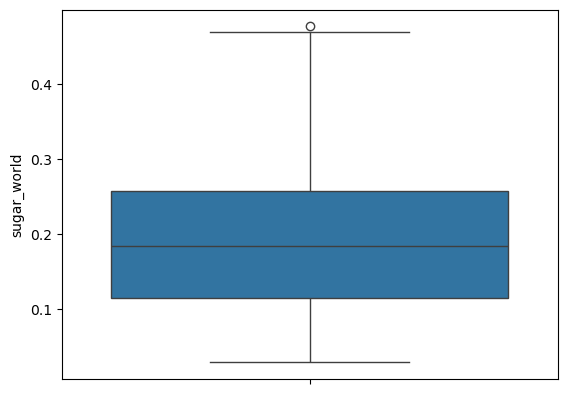

In [57]:
for col in df.columns:
    if (df[col].dtype != 'object'):
        sns.boxplot(data = df, y = col)
        plt.show()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 0 to 739
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       576 non-null    int64  
 1   date             576 non-null    object 
 2   oil_brent        576 non-null    float64
 3   oil_dubai        576 non-null    float64
 4   coffee_arabica   576 non-null    float64
 5   coffee_robustas  576 non-null    float64
 6   tea_columbo      576 non-null    float64
 7   tea_kolkata      576 non-null    float64
 8   tea_mombasa      576 non-null    float64
 9   sugar_eu         576 non-null    float64
 10  sugar_us         576 non-null    float64
 11  sugar_world      576 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 58.5+ KB


In [61]:
df.describe()

,Unnamed: 0,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,323.906250,20.999878,19.715082,2.178528,1.538308,1.414661,1.671906,1.452477,0.399039,0.376091,0.187043
std,196.638963,18.937283,18.045464,1.098985,0.868825,0.693034,0.606440,0.452336,0.205686,0.155134,0.095689
min,1.000000,1.210000,1.210000,0.777600,0.487210,0.434198,0.664799,0.719600,0.112215,0.116845,0.028700
25%,144.750000,1.762500,1.762500,1.156550,0.796267,0.824182,1.121401,0.991200,0.137072,0.186842,0.114850
50%,331.500000,17.625000,15.800000,2.037150,1.282417,1.344482,1.702827,1.479888,0.401682,0.459847,0.184100
75%,476.250000,29.225000,27.443143,2.985200,2.040320,1.793132,2.073608,1.696816,0.592645,0.483825,0.256663
max,740.000000,77.204091,72.130000,5.892300,4.162100,3.410000,3.351542,2.767500,0.706600,0.759712,0.476200


In [90]:
df.size

6336

In [92]:
df['date'].size

576

In [94]:
df.shape

(576, 11)

In [96]:
df.shape[0]

576

In [98]:
df.size/df.shape[1]

576.0

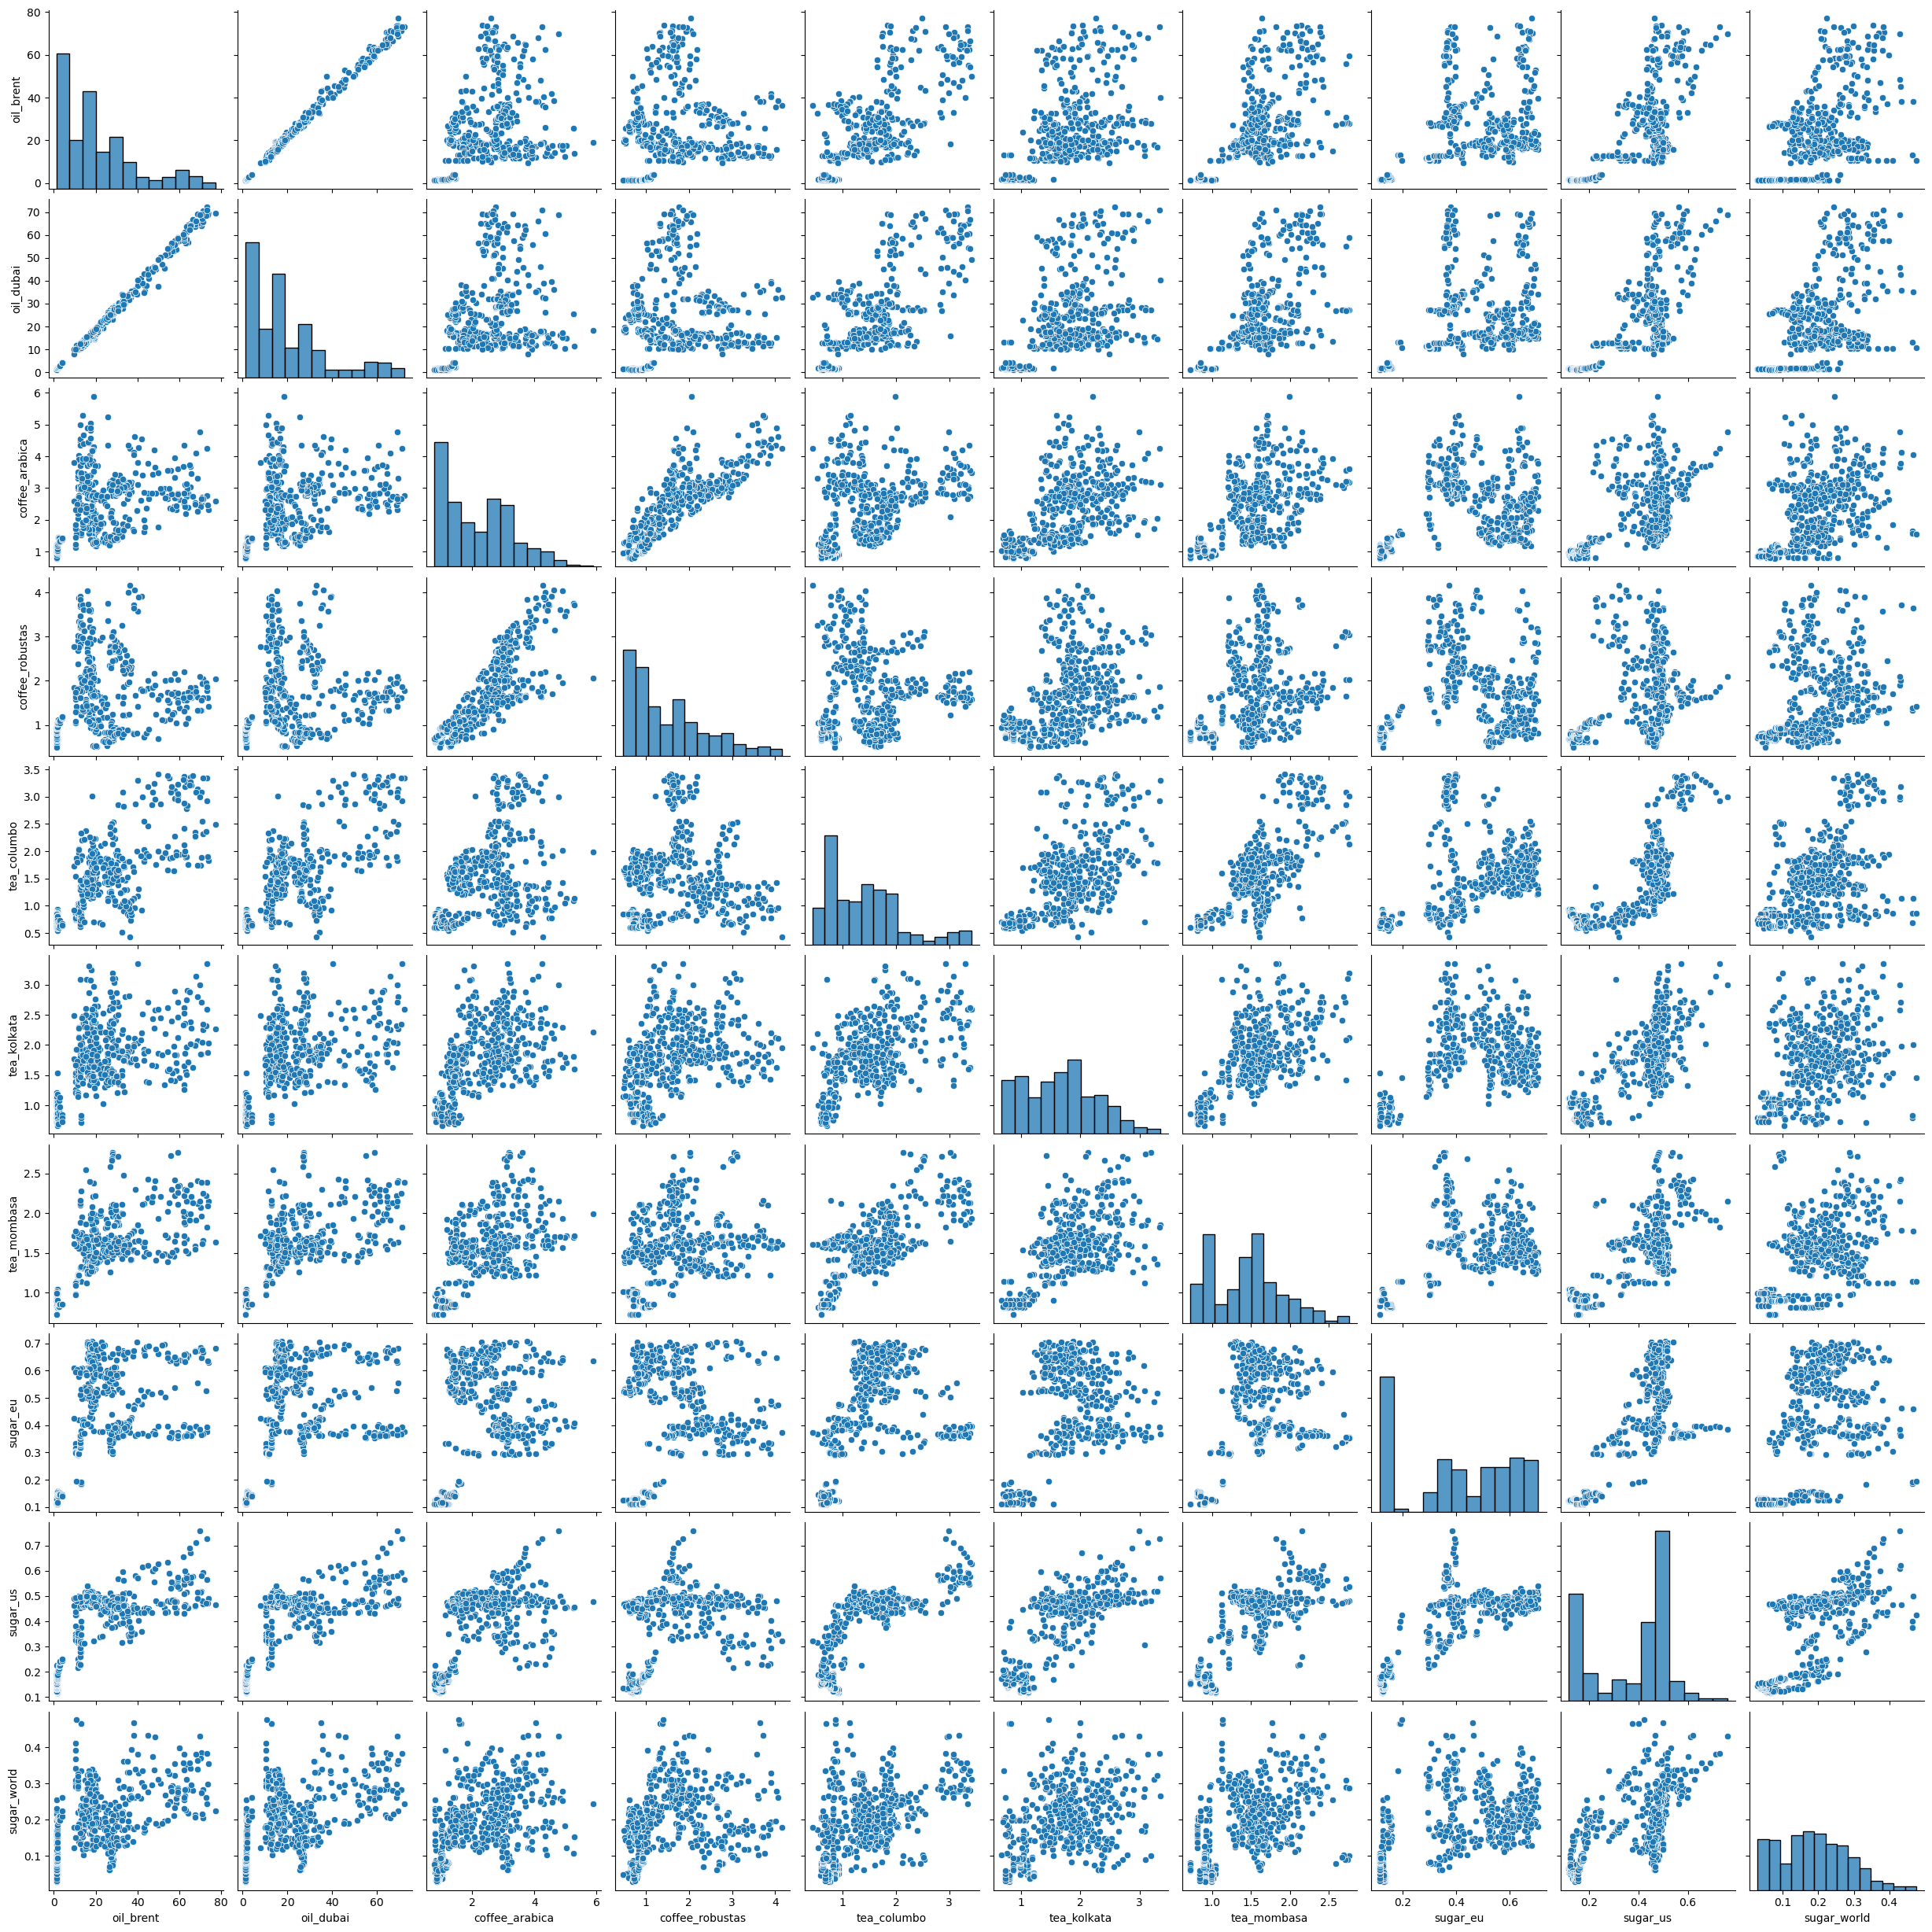

In [112]:
sns.pairplot(df)

In [118]:
c = df.corr(numeric_only = True)

In [124]:
c.min()

oil_brent          0.271450
oil_dubai          0.279882
coffee_arabica     0.480659
coffee_robustas    0.161857
tea_columbo        0.161857
tea_kolkata        0.490251
tea_mombasa        0.457369
sugar_eu           0.286311
sugar_us           0.413673
sugar_world        0.350958
dtype: float64

In [128]:
c[c != c.max()].max()

oil_brent          0.997588
oil_dubai          0.997588
coffee_arabica     0.869532
coffee_robustas    0.869532
tea_columbo        0.804926
tea_kolkata        0.787674
tea_mombasa        0.804926
sugar_eu           0.829529
sugar_us           0.829529
sugar_world        0.688227
dtype: float64

<Axes: >

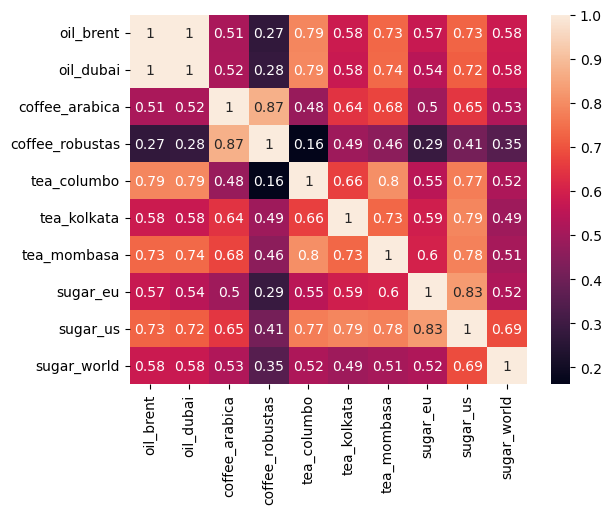

In [132]:
sns.heatmap(c, annot=True)

In [134]:
df.head()

,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1960-01-01,1.63,1.63,0.9409,0.696864,0.930301,1.121401,1.0374,0.122356,0.116845,0.0666
1,1960-02-01,1.63,1.63,0.9469,0.688707,0.930301,1.121401,1.0374,0.122356,0.119049,0.0679
2,1960-03-01,1.63,1.63,0.9281,0.688707,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683
3,1960-04-01,1.63,1.63,0.9303,0.684519,0.930301,1.121401,1.0374,0.122356,0.123459,0.0681
4,1960-05-01,1.63,1.63,0.9200,0.690692,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683


In [193]:
df[df['coffee_robustas'] == df['coffee_robustas'].min()].loc[:,['date','coffee_robustas']]


,date,coffee_robustas
64,1965-05-01,0.48721


In [195]:
df[df['coffee_robustas'] == df['coffee_robustas'].max()].loc[:,['date','coffee_robustas']]

,date,coffee_robustas
233,1979-06-01,4.1621


In [201]:
new_df = df[(df['date'] >= '1960-01-01') & (df['date'] <= '1980-12-31')]

In [203]:
new_df

,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1960-01-01,1.630000,1.63,0.9409,0.696864,0.930301,1.121401,1.037400,0.122356,0.116845,0.0666
1,1960-02-01,1.630000,1.63,0.9469,0.688707,0.930301,1.121401,1.037400,0.122356,0.119049,0.0679
2,1960-03-01,1.630000,1.63,0.9281,0.688707,0.930301,1.121401,1.037400,0.122356,0.121254,0.0683
3,1960-04-01,1.630000,1.63,0.9303,0.684519,0.930301,1.121401,1.037400,0.122356,0.123459,0.0681
4,1960-05-01,1.630000,1.63,0.9200,0.690692,0.930301,1.121401,1.037400,0.122356,0.121254,0.0683
...,...,...,...,...,...,...,...,...,...,...,...
238,1979-11-01,42.000000,39.50,4.5574,3.909000,0.922358,2.198167,1.631778,0.476859,0.359133,0.3030
239,1979-12-01,40.500000,39.00,4.2831,3.902000,1.313053,2.044681,1.655072,0.487882,0.403445,0.3290
240,1980-01-01,40.000000,38.00,3.8078,3.571300,1.185947,2.030021,1.842562,0.492733,0.433428,0.3810
242,1980-03-01,38.250000,35.75,4.1173,3.722500,1.141416,1.985558,1.785539,0.463411,0.466939,0.4330


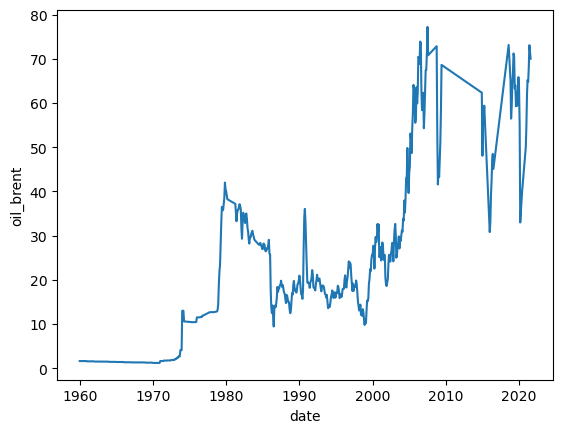

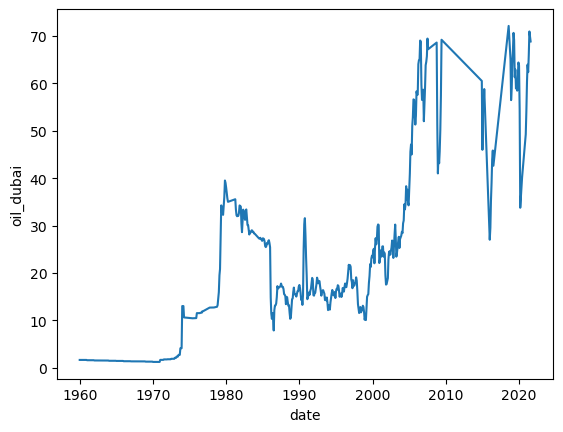

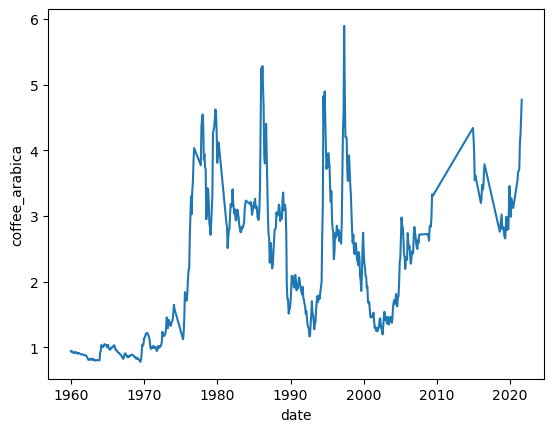

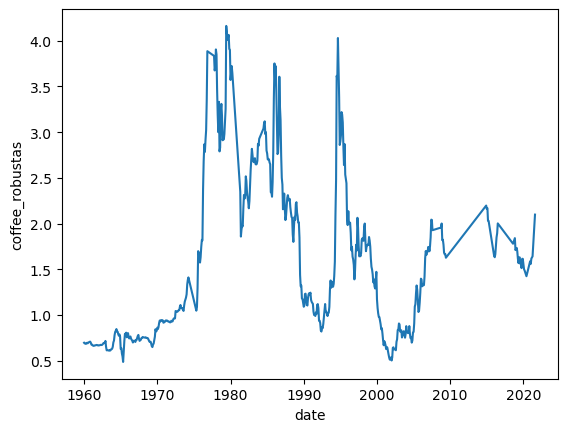

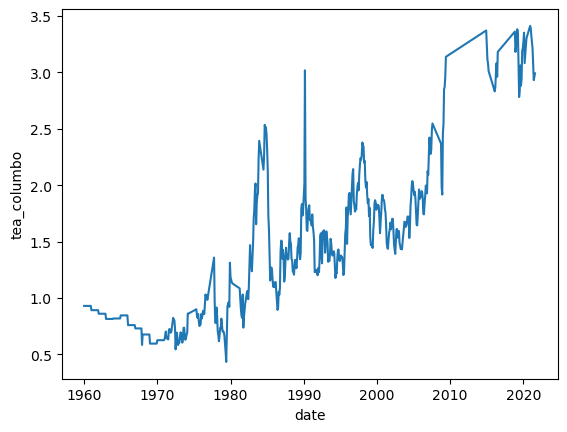

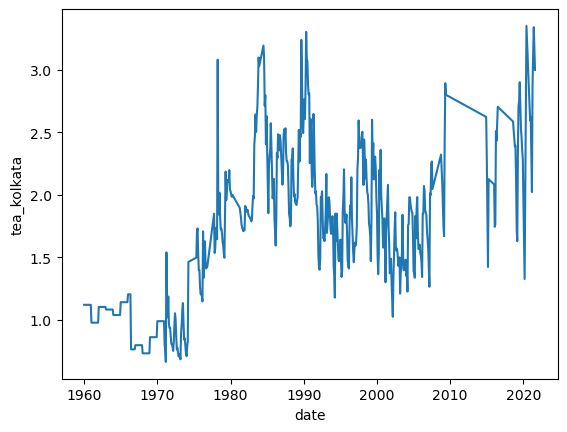

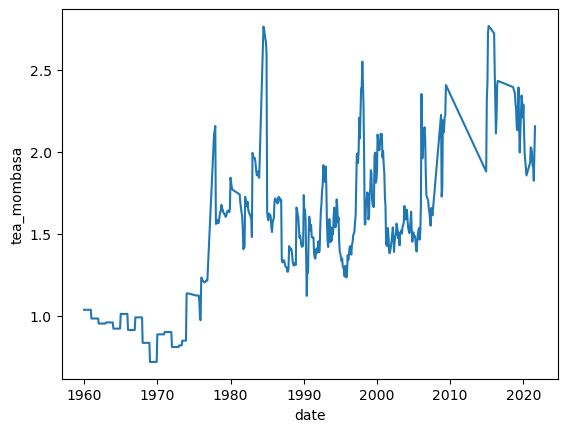

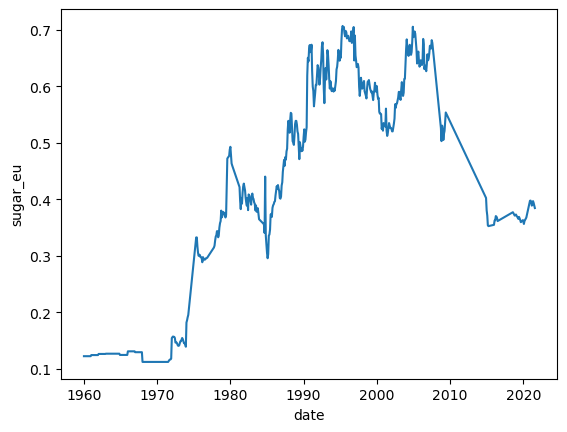

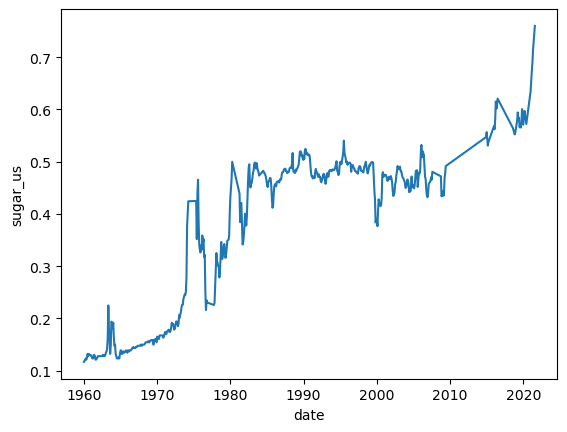

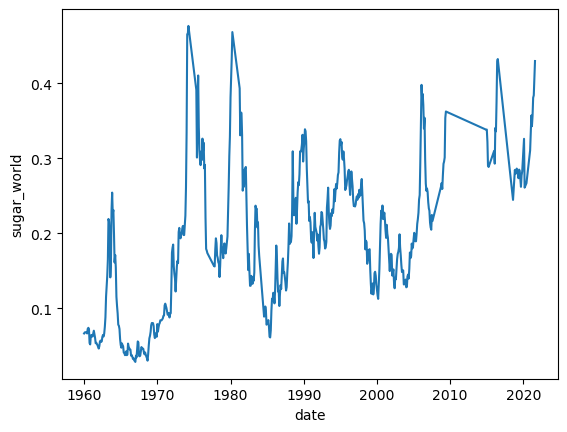

In [210]:
for col in df.columns:
    if(df[col].dtype in ('int64', 'float64')):
        sns.lineplot(data=df, x=df['date'], y=df[col])
        plt.show()

In [218]:
for col in df.columns:
    if(df[col].dtype in ('int64', 'float64')):
        diff = df[col].max() - df[col].min()
        print(f"{col} min_max diff is: {diff}")

oil_brent min_max diff is: 75.99409090909
oil_dubai min_max diff is: 70.92
coffee_arabica min_max diff is: 5.1147
coffee_robustas min_max diff is: 3.6748901999999997
tea_columbo min_max diff is: 2.9758021
tea_kolkata min_max diff is: 2.68674261088
tea_mombasa min_max diff is: 2.0479003000000002
sugar_eu min_max diff is: 0.594384842
sugar_us min_max diff is: 0.642867192
sugar_world min_max diff is: 0.4475


In [238]:
price_exceeding_10 = df[df['oil_dubai'] > 10].shape[0]
price_exceeding_10

407

In [240]:
df.max() - df.min()

date               22493 days 00:00:00
oil_brent                    75.994091
oil_dubai                        70.92
coffee_arabica                  5.1147
coffee_robustas                3.67489
tea_columbo                   2.975802
tea_kolkata                   2.686743
tea_mombasa                     2.0479
sugar_eu                      0.594385
sugar_us                      0.642867
sugar_world                     0.4475
dtype: object

In [262]:
### 4th highest price of oil_dubai

df.sort_values(by = 'oil_dubai', ascending = False).loc[3,'oil_dubai']


1.63000011444